In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S = 100     # Initial Price
K = 90      # Strike
r = 0.05    # Risk-free Rate
sig = 0.2   # Volatility
T = 1       # Maturity
M = 100     # Time Steps
N = 1000    # Number of Paths
H = 130     # Barrier

In [2]:
dt = T / M
paths = np.zeros((N, M+1))
paths[:, 0] = S

drift = (r - 0.5 * sig**2) * dt
diff = sig * np.sqrt(dt)

for t in range(1, M+1):
    z = np.random.normal(0, 1, N)
    paths[:, t] = paths[:, t-1] * np.exp(drift + diff * z)

In [3]:
knocked = np.any(paths >= H, axis=1)
alive = (~knocked).astype(float)

payoffs = np.maximum(paths[:, -1] - K, 0)
payoffs = payoffs * alive

price = np.exp(-r * T) * np.mean(payoffs)
print("Up and Out Barrier option price: {:.4f}".format(price))

Up and Out Barrier option price: 7.7742


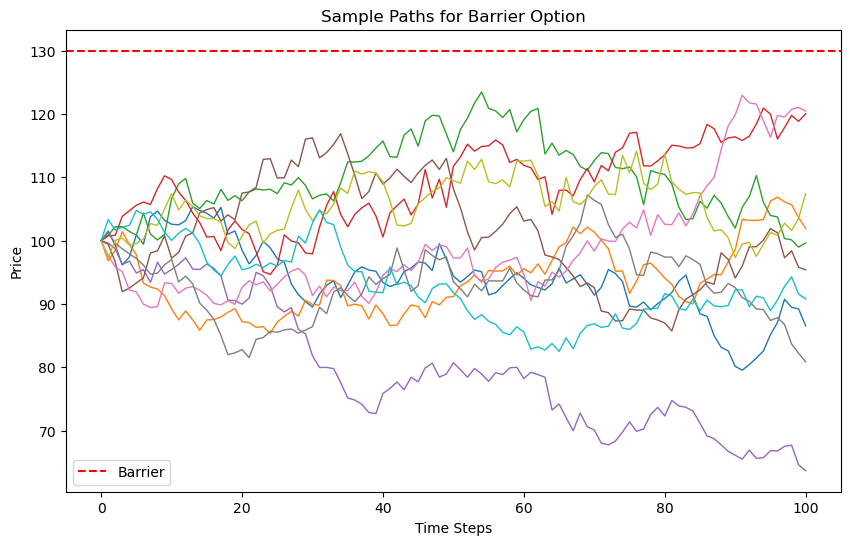

In [4]:
plt.figure(figsize=(10,6))
for i in range(10):  # Plot 10 sample paths
    plt.plot(paths[i], lw=1)

plt.axhline(H, color='red', linestyle='--', label='Barrier')
plt.title("Sample Paths for Barrier Option")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.show()

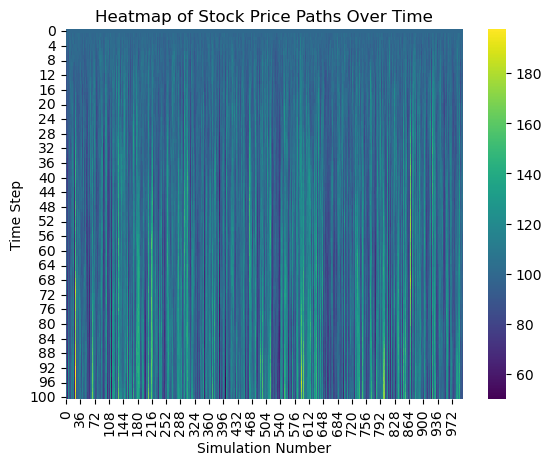

In [5]:
import seaborn as sns

sns.heatmap(paths.T, cmap="viridis", cbar=True)
plt.title("Heatmap of Stock Price Paths Over Time")
plt.xlabel("Simulation Number")
plt.ylabel("Time Step")
plt.show()

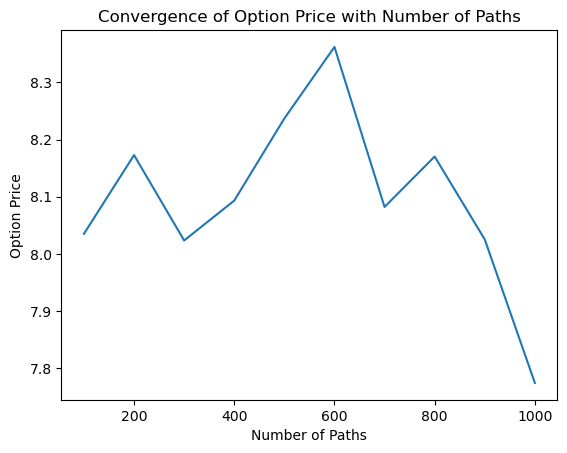

In [7]:
prices = []
path_counts = range(100, N+1, 100)  # increments of 100 paths

for count in path_counts:
    # Use only the first 'count' paths
    subset_paths = paths[:count, :]
    
    # Identify paths that hit the barrier
    knocked = np.any(subset_paths >= H, axis=1)
    alive = (~knocked).astype(float)
    
    # Calculate payoffs for these paths
    payoffs = np.maximum(subset_paths[:, -1] - K, 0)
    payoffs = payoffs * alive
    
    # Discount the average payoff to present value
    price = np.exp(-r * T) * np.mean(payoffs)
    prices.append(price)

# Plot convergence of option price as number of paths increases
plt.plot(path_counts, prices)
plt.title("Convergence of Option Price with Number of Paths")
plt.xlabel("Number of Paths")
plt.ylabel("Option Price")
plt.show()

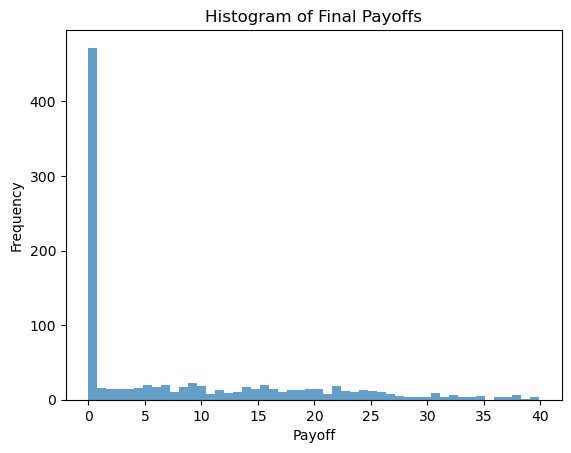

In [8]:
plt.hist(payoffs, bins=50, alpha=0.7)
plt.title('Histogram of Final Payoffs')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.show()